<a href="https://colab.research.google.com/github/yohanesnuwara/nuwara-online-courses/blob/master/Agus_Abdullah_course/segscup2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import pandas as pd

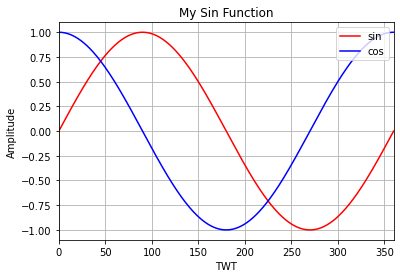

In [ ]:
x = np.linspace(0, 360, 360)
# x = np.arange(0,6,0.5)
y = np.sin(np.deg2rad(x))
z = np.cos(x*np.pi/180) # other alternative
plt.plot(x, y, 'r', label='sin')
plt.plot(x, z, 'b', label='cos')
plt.xlim(0,360)
plt.grid()
plt.title('My Sin Function')
plt.xlabel('TWT'); plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.show()

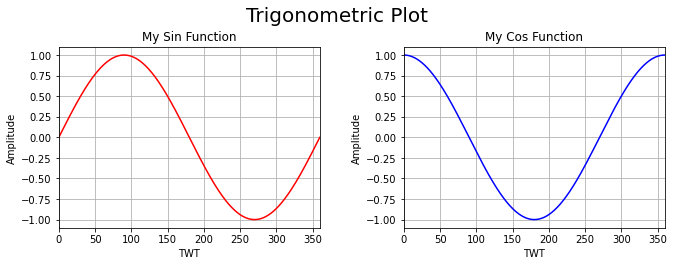

In [ ]:
x = np.linspace(0, 360, 360)
y = np.sin(np.deg2rad(x))
z = np.cos(x*np.pi/180) # other alternative

plt.figure(figsize=(10,4))
plt.suptitle('Trigonometric Plot', size=20) # superior title

plt.subplot(1,2,1)
plt.plot(x, y, 'r', label='sin')
plt.xlim(0,360)
plt.grid()
plt.title('My Sin Function')
plt.xlabel('TWT'); plt.ylabel('Amplitude')
# plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(x, z, 'b', label='cos')
plt.xlim(0,360)
plt.grid()
plt.title('My Cos Function')
plt.xlabel('TWT'); plt.ylabel('Amplitude')
# plt.legend(loc='upper right')

plt.tight_layout(pad=3.0)
plt.show()

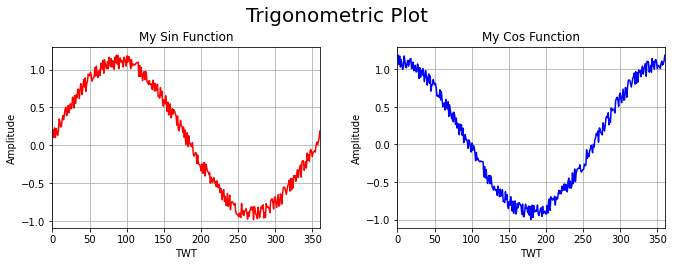

In [ ]:
x = np.linspace(0, 360, 360)
y = np.sin(np.deg2rad(x))
z = np.cos(x*np.pi/180) # other alternative

n = np.random.random(len(x)) * 0.2 # noise 20%
y = y + n
z = z + n

plt.figure(figsize=(10,4))
plt.suptitle('Trigonometric Plot', size=20) # superior title

plt.subplot(1,2,1)
plt.plot(x, y, 'r', label='sin')
plt.xlim(0,360)
plt.grid()
plt.title('My Sin Function')
plt.xlabel('TWT'); plt.ylabel('Amplitude')
# plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(x, z, 'b', label='cos')
plt.xlim(0,360)
plt.grid()
plt.title('My Cos Function')
plt.xlabel('TWT'); plt.ylabel('Amplitude')
# plt.legend(loc='upper right')

plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y



def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

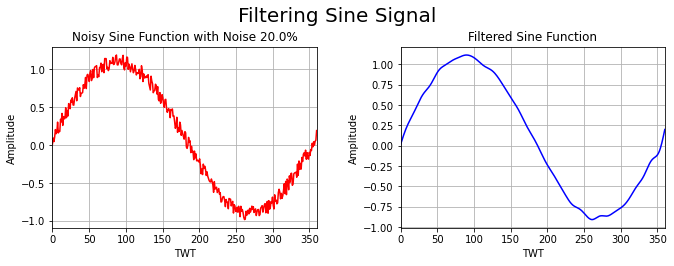

In [ ]:
x = np.linspace(0, 360, 360)
y = np.sin(np.deg2rad(x))
# z = np.cos(x*np.pi/180) # other alternative

noise = 0.2 # noise 20%
n = np.random.random(len(x)) * noise 
yn = y + n
fs = 1000/1
ybpf = butter_lowpass_filter(yn, 48, 1000/1, order=5) # sample rate 4

plt.figure(figsize=(10,4))
plt.suptitle('Filtering Sine Signal', size=20) # superior title

plt.subplot(1,2,1)
plt.plot(x, yn, 'r', label='sin')
plt.xlim(0,360)
plt.grid()
plt.title('Noisy Sine Function with Noise {}%'.format(noise*100))
plt.xlabel('TWT'); plt.ylabel('Amplitude')
# plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.plot(x, ybpf, 'b', label='cos')
plt.xlim(0,360)
plt.grid()
plt.title('Filtered Sine Function')
plt.xlabel('TWT'); plt.ylabel('Amplitude')
# plt.legend(loc='upper right')

plt.tight_layout(pad=3.0)
plt.show()

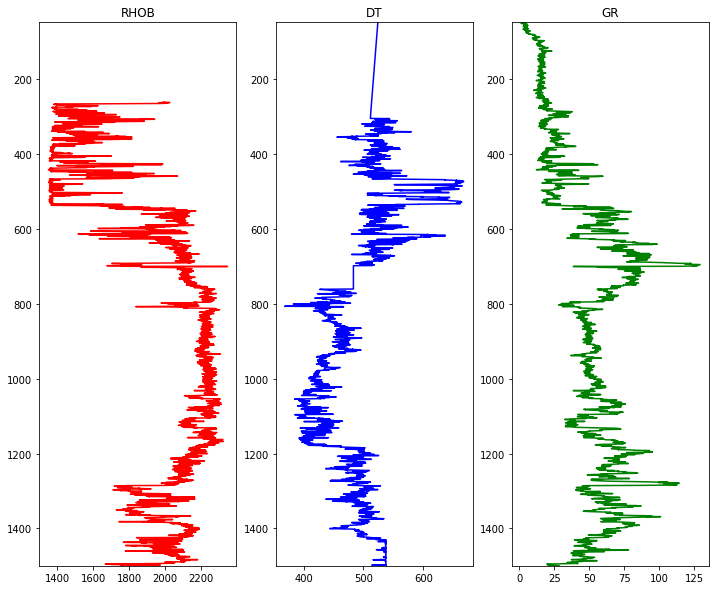

In [ ]:
well1 = '/content/F02-1_logs.las'
well2 = '/content/F03-2_logs.las'

data = np.loadtxt(well1, skiprows=35)
data[data==-999.2500]=np.nan # remove -999.25 and change with NaN (not a numeric)
mneumonics = ['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AIR', 'PHIE']
data = pd.DataFrame(data, columns=mneumonics)
data = data[['DEPTH', 'RHOB', 'DT', 'GR', 'PHIE']].values

rows, cols = 1, 3
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10))
ax[0].plot(data[:,1], data[:,0], color='r') # rhob
ax[0].set_ylim(max(data[:,0]), min(data[:,0])) # invert y
ax[0].set_title(mneumonics[1])
ax[1].plot(data[:,2], data[:,0], color='b') # dt
ax[1].set_ylim(max(data[:,0]), min(data[:,0])) # invert y
ax[1].set_title(mneumonics[2])
ax[2].plot(data[:,3], data[:,0], color='green') # gr
ax[2].set_ylim(max(data[:,0]), min(data[:,0])) # invert y
ax[2].set_title(mneumonics[3])
plt.show()

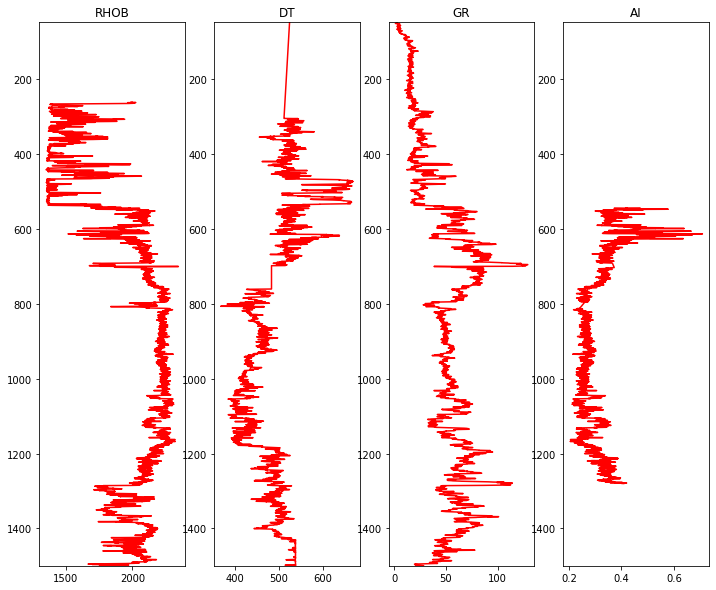

In [ ]:
well1 = '/content/F02-1_logs.las'
well2 = '/content/F03-2_logs.las'

data = np.loadtxt(well1, skiprows=35)
data[data==-999.2500]=np.nan # remove -999.25 and change with NaN (not a numeric)
mneumonics = ['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AIR', 'PHIE']
data = pd.DataFrame(data, columns=mneumonics)
data = data[['DEPTH', 'RHOB', 'DT', 'GR', 'PHIE']].values

rows, cols = 1, 4
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10))

for i in range(cols):
  ax[i].plot(data[:,i+1], data[:,0], color='r') # rhob
  ax[i].set_ylim(max(data[:,0]), min(data[:,0])) # invert y
  ax[i].set_title(mneumonics[i+1])

plt.show()

## Facies Log

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in less


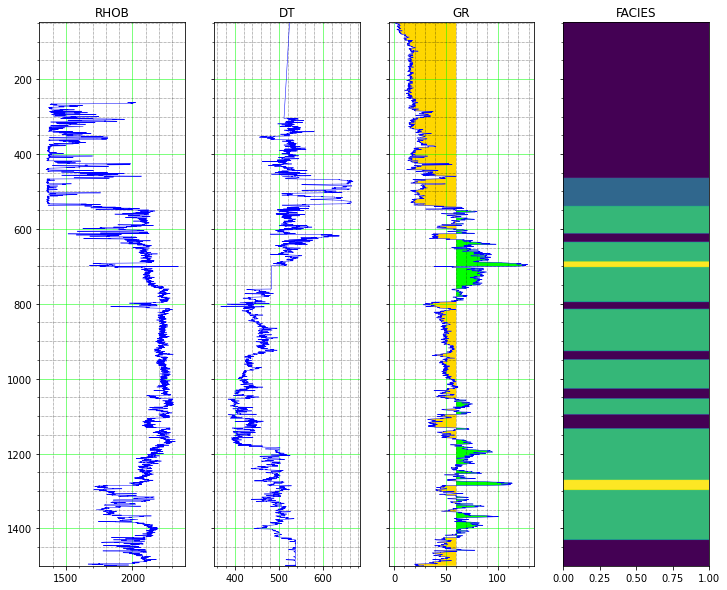

In [ ]:
pd.set_option('display.expand_frame_repr', False)

data = np.loadtxt(well1, skiprows=35)
data[data==-999.2500]=np.nan
mneumonics =  ['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AIR', 'PHIE']
data = pd.DataFrame(data, columns=mneumonics)

tb=  [0,464,539,612,635,687,702, 795, 814, 926, 949, 1026, 1053, 1095, 1133, 1270,1297, 1430,2000]
f = [1,2,3,1,3,4,3,1,3,1,3,1,3,1,3,4,3,1] #FACIES NO

depth = data.DEPTH.values
facies=[]

for i in range(len(depth)):
    for j in range(len(tb)-1):
        if depth[i] > tb[j] and depth[i] <=tb[j+1]:
            facies.append(f[j])

data['FACIES'] = facies

data.to_csv('/content/well.csv', index=False)

data = data[['DEPTH','RHOB', 'DT', 'GR', 'FACIES']].values
mneumonics = ['RHOB', 'DT', 'GR', 'FACIES']

rows,cols = 1,4
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)

for i in range(cols):
    if i < cols-1:
        ax[i].plot(data[:,i+1], data[:,0], linewidth = '0.5', color='b')
        ax[i].set_ylim(max(data[:,0]), min(data[:,0]))
        ax[i].set_title('%s' % mneumonics[i])
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    elif i==cols-1:
        F = np.vstack((facies,facies)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data[:, 0]), min(data[:, 0])])
        ax[i].set_title('%s' % mneumonics[i])
y2 = data[:,3]  #GR
y1 = y2*0+60 #60 API is Sand-Shale Boundary Line
ax[2].fill_betweenx(data[:,0],y1,y2,where=(y1>=y2), color = 'gold', linewidth=0) #sand
ax[2].fill_betweenx(data[:,0],y1,y2,where=(y1<y2), color = 'lime', linewidth=0) #shale
plt.show()

## KNN (K-Nearest Neighbor)

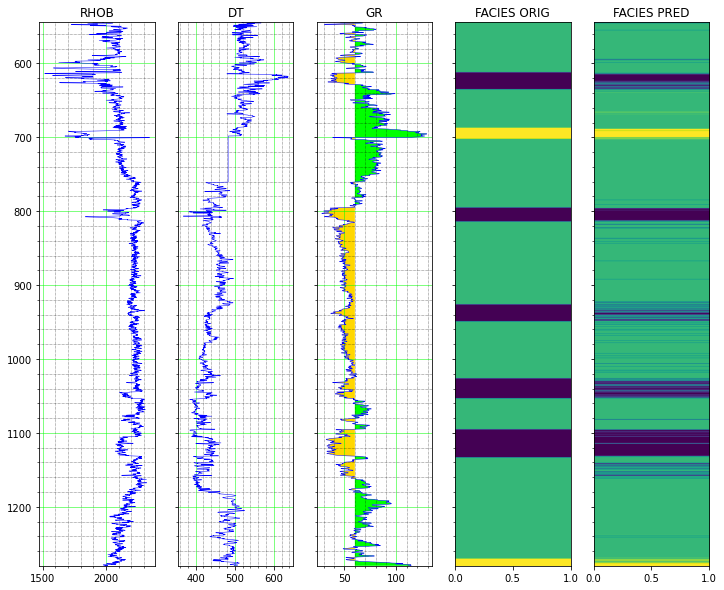

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.expand_frame_repr', False)
data = pd.read_csv('/content/well.csv')

data = data.dropna(how='any')
X_train = data.iloc[:,1:4].values
Y_train = data.iloc[:,-1].values

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train,Y_train)

X_test = X_train
y_pred = model.predict(X_test)
data = data.values
mneumonics = [ 'RHOB', 'DT', 'GR', 'FACIES ORIG', 'FACIES PRED']
rows,cols = 1,5
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)

F_train = []
F_test = []

for i in range(cols):
    if i < cols-2:
        ax[i].plot(data[:,i+1], data[:,0], linewidth = '0.5', color='b')
        ax[i].set_ylim(max(data[:,0]), min(data[:,0]))
        ax[i].set_title('%s' % mneumonics[i])
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    elif i==cols-2:
        F = np.vstack((Y_train,Y_train)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data[:, 0]), min(data[:, 0])])
        ax[i].set_title('%s' % mneumonics[i])
        F_train.append(F)
    elif i==cols-1:
        F = np.vstack((y_pred,y_pred)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data[:, 0]), min(data[:, 0])])
        ax[i].set_title('%s' % mneumonics[i])
        F_test.append(F)
y2 = data[:,3]  #GR
y1 = y2*0+60 #60 API is Sand-Shale Boundary Line
ax[2].fill_betweenx(data[:,0],y1,y2,where=(y1>=y2), color = 'gold', linewidth=0)
ax[2].fill_betweenx(data[:,0],y1,y2,where=(y1<y2), color = 'lime', linewidth=0)
plt.show()

## Well F03-2 as blind test

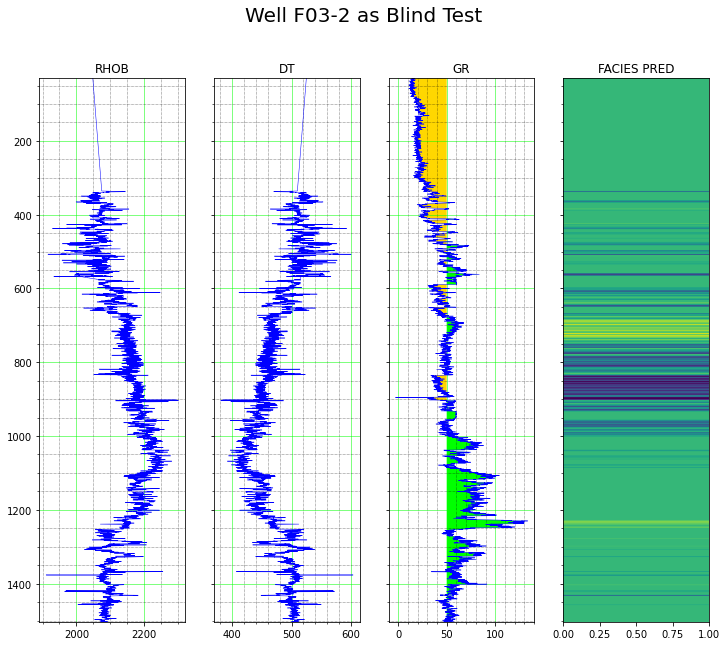

In [ ]:
data2 = np.loadtxt(well2, skiprows=35)
data2[data2==-999.2500]=np.nan
mneumonics =  ['DEPTH', 'RHOB', 'DT', 'GR', 'AI', 'AIR', 'PHIE']
data2 = pd.DataFrame(data2, columns=mneumonics)

data2 = data2.dropna(how='any')
X_test = data2.iloc[:,1:4].values

# apply KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)

# predict
y_pred = model.predict(X_test)
data2 = data2.values
mneumonics = [ 'RHOB', 'DT', 'GR', 'FACIES PRED']
rows,cols = 1,4
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(12,10), sharey=True)

fig.suptitle('Well F03-2 as Blind Test', size=20)

for i in range(cols):
    if i < cols-1:
        ax[i].plot(data2[:,i+1], data2[:,0], linewidth = '0.5', color='b')
        ax[i].set_ylim(max(data2[:,0]), min(data2[:,0]))
        ax[i].set_title('%s' % mneumonics[i])
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    # elif i==cols-2:
    #     F = np.vstack((Y_train,Y_train)).T
    #     ax[i].imshow(F, aspect='auto', extent=[0,1,max(data2[:, 0]), min(data2[:, 0])])
    #     ax[i].set_title('%s' % mneumonics[i])
    #     F_train.append(F)
    elif i==cols-1:
        F = np.vstack((y_pred,y_pred)).T
        ax[i].imshow(F, aspect='auto', extent=[0,1,max(data2[:, 0]), min(data2[:, 0])])
        ax[i].set_title('%s' % mneumonics[i])
        F_test.append(F)

y2 = data2[:,3]  #GR
y1 = y2*0+50 #60 API is Sand-Shale Boundary Line
ax[2].fill_betweenx(data2[:,0],y1,y2,where=(y1>=y2), color = 'gold', linewidth=0)
ax[2].fill_betweenx(data2[:,0],y1,y2,where=(y1<y2), color = 'lime', linewidth=0)
plt.show()
